In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import plotnine
from plotnine import *

In [2]:
def f_sin(x):
  f=np.sin(2*np.pi*x)
  return f

In [3]:
np.random.RandomState(77)
x = np.random.uniform(0, 1, 100)
x = np.sort(x)
y = f_sin(x) +np.random.normal(0, 0.2, 100)

data = pd.DataFrame(x,y)
data.head()

,0
0.028152,0.013270
-0.157838,0.016236
0.133077,0.030414
0.261795,0.031271
0.405919,0.038447


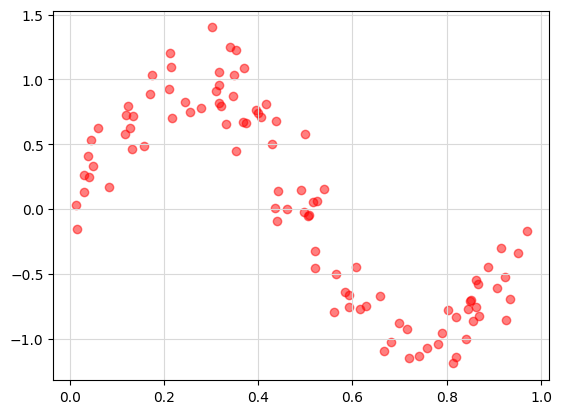

In [4]:
plt.grid(color='0.85')
plt.scatter(x, y, color="red", alpha=0.5)
plt.show()

In [5]:
lm1 = LinearRegression()
poly_1 = PolynomialFeatures(degree=1)
poly_1_features = poly_1.fit_transform(x.reshape(-1,1))
lm1.fit(poly_1_features, y)

LinearRegression()

In [6]:
lm3 = LinearRegression()
poly_3 = PolynomialFeatures(degree=3)
poly_3_features = poly_3.fit_transform(x.reshape(-1,1))
lm3.fit(poly_3_features, y)

LinearRegression()

In [7]:
lm10 = LinearRegression()
poly_10 = PolynomialFeatures(degree=10)
poly_10_features = poly_10.fit_transform(x.reshape(-1,1))
lm10.fit(poly_10_features, y)

LinearRegression()

In [8]:
y_pred1 = lm1.predict(poly_1_features)
y_pred3 = lm3.predict(poly_3_features)
y_pred10 = lm10.predict(poly_10_features)

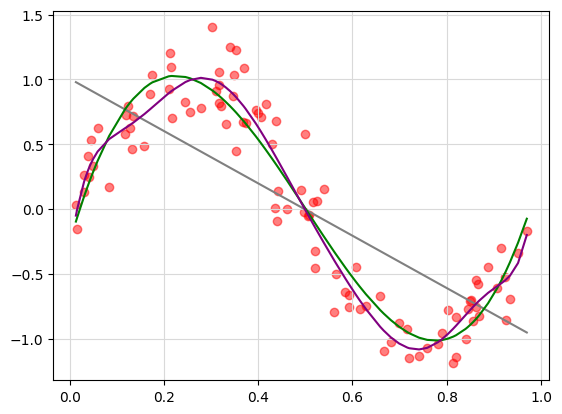

In [9]:
plt.grid(color='0.85')
plt.scatter(x, y, label = "dados", color = "red", alpha = 0.5)
plt.plot(x, y_pred1, c="grey", label = "lm1")
plt.plot(x, y_pred3, c="green", label = "lm3")
plt.plot(x, y_pred10, c="purple", label = "lm10")
plt.show()

In [10]:
pred = pd.DataFrame({"model": np.zeros(100),
                     "erro": np.zeros(100)})

x0=np.array([0.75])

E_y=f_sin(x0)
E_y

array([-1.])

In [11]:
np.random.RandomState(812)

i=0
for k in np.arange(0,100,1):

  y_ = f_sin(x) + np.random.normal(0, .1, 100)

  poly_1_features_ = poly_1.fit_transform(x.reshape(-1,1))
  lm1.fit(poly_1_features_, y_)
  poly_3_features_ = poly_3.fit_transform(x.reshape(-1,1))
  lm3.fit(poly_3_features_, y_)
  poly_10_features_ = poly_10.fit_transform(x.reshape(-1,1))
  lm10.fit(poly_10_features_, y_)

  poly_1_features0 = poly_1.fit_transform(x0.reshape(-1,1))
  poly_3_features0 = poly_3.fit_transform(x0.reshape(-1,1))
  poly_10_features0 = poly_10.fit_transform(x0.reshape(-1,1))

  pred1 = lm1.predict(poly_1_features0)
  pred3 = lm3.predict(poly_3_features0)
  pred10 = lm10.predict(poly_10_features0)

  erro1 = pred1 - E_y
  erro3 = pred3 - E_y
  erro10 = pred10 - E_y

  pred.loc[i, ['model']] = 1
  pred.loc[i+1, ['model']] = 3
  pred.loc[i+2, ['model']] = 10

  pred.loc[i, ['erro']] = erro1
  pred.loc[i+1, ['erro']] = erro3
  pred.loc[i+2, ['erro']] = erro10

  i=i+3

In [12]:
pred

,model,erro
0,1.0,0.497629
1,3.0,0.016119
2,10.0,-0.011792
3,1.0,0.482526
4,3.0,-0.018497
...,...,...
295,3.0,0.022253
296,10.0,-0.006212
297,1.0,0.523542
298,3.0,0.027120


<Axes: title={'center': 'erro'}, xlabel='model'>

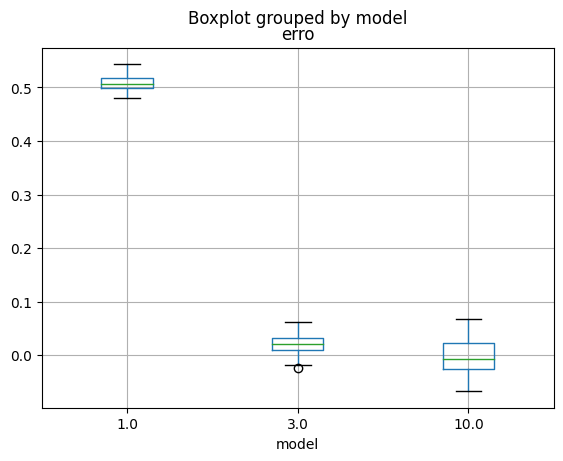

In [13]:
pred.boxplot(column="erro",by="model")

In [14]:
pred_ = pred.pivot(columns = 'model',
                     values = 'erro')
pred_.head()

model,1.0,3.0,10.0
0,0.497629,NaN,NaN
1,NaN,0.016119,NaN
2,NaN,NaN,-0.011792
3,0.482526,NaN,NaN
4,NaN,-0.018497,NaN


Text(0.5, 0, 'erro')

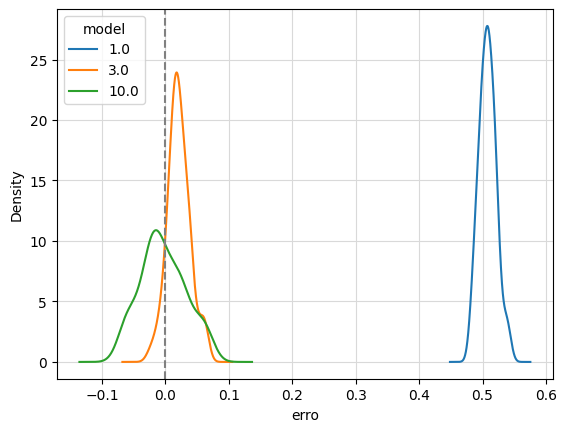

In [15]:
pred_.plot.density()
plt.grid(color='0.85')
plt.axvline(x=0, c="grey", ls="--")
plt.xlabel("erro")

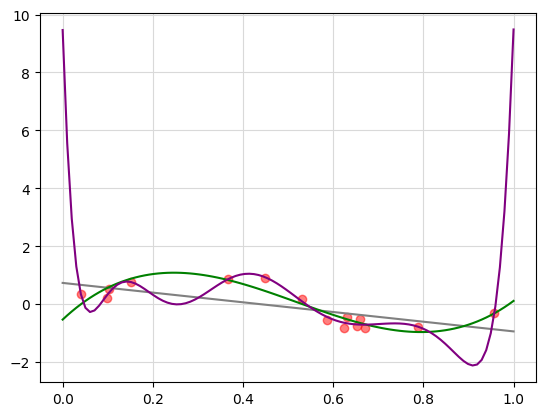

In [33]:
np.random.RandomState(6)
x = np.random.uniform(0, 1, 15)
x = np.sort(x)
y = f_sin(x) +np.random.normal(0, 0.2, 15)

data = pd.DataFrame(x,y)
data.head()

poly_1_features = poly_1.fit_transform(x.reshape(-1,1))
lm1.fit(poly_1_features, y)

poly_3_features = poly_3.fit_transform(x.reshape(-1,1))
lm3.fit(poly_3_features, y)

poly_10_features = poly_10.fit_transform(x.reshape(-1,1))
lm10.fit(poly_10_features, y)

x_ = np.linspace(0, 1, 100)

poly_1_features_ = poly_1.fit_transform(x_.reshape(-1,1))
poly_3_features_ = poly_3.fit_transform(x_.reshape(-1,1))
poly_10_features_ = poly_10.fit_transform(x_.reshape(-1,1))

y_pred1 = lm1.predict(poly_1_features_)
y_pred3 = lm3.predict(poly_3_features_)
y_pred10 = lm10.predict(poly_10_features_)

plt.grid(color='0.85')
plt.scatter(x, y, label = "dados", color = "red", alpha = 0.5)
plt.plot(x_, y_pred1, c="grey", label = "lm1")
plt.plot(x_, y_pred3, c="green", label = "lm3")
plt.plot(x_, y_pred10, c="purple", label = "lm10")
plt.show()

In [44]:
np.random.RandomState(8)
xa = np.random.uniform(0,1,20)
ya = f_sin(xa) +np.random.normal(0, 0.2, 20)

poly_1_featuresa = poly_1.fit_transform(xa.reshape(-1,1))
lm1.fit(poly_1_featuresa, ya)

poly_3_featuresa = poly_3.fit_transform(xa.reshape(-1,1))
lm3.fit(poly_3_featuresa, ya)

poly_10_featuresa = poly_10.fit_transform(xa.reshape(-1,1))
lm10.fit(poly_10_featuresa, ya)

y_pred1a = lm1.predict(poly_1_featuresa)
y_pred3a = lm3.predict(poly_3_featuresa)
y_pred10a = lm10.predict(poly_10_featuresa)


xb = np.random.uniform(0,1,20)
yb = f_sin(xb) +np.random.normal(0, 0.2, 20)

poly_1_featuresb = poly_1.fit_transform(xb.reshape(-1,1))
poly_3_featuresb = poly_3.fit_transform(xb.reshape(-1,1))
poly_10_featuresb = poly_10.fit_transform(xb.reshape(-1,1))

y_pred1b = lm1.predict(poly_1_featuresb)
y_pred3b = lm3.predict(poly_3_featuresb)
y_pred10b = lm10.predict(poly_10_featuresb)

def MSE(obs, pred):
  mse = np.mean((obs-pred)**2)
  return mse

MSE1_T = MSE(ya,y_pred1a)
MSE3_T = MSE(ya,y_pred3a)
MSE10_T = MSE(ya,y_pred10a)

MSE1_t = MSE(yb,y_pred1b)
MSE3_t = MSE(yb,y_pred3b)
MSE10_t = MSE(yb,y_pred10b)

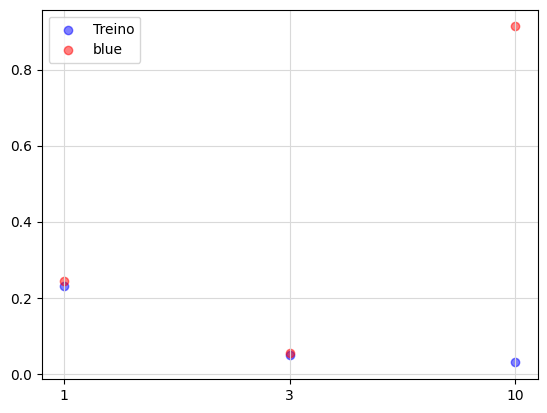

In [45]:
MSE_T = np.array([MSE1_T,MSE3_T,MSE10_T])
MSE_t = np.array([MSE1_t,MSE3_t,MSE10_t])
model = np.array(["1","3","10"])

plt.grid(color='0.85')
plt.scatter(model, MSE_T, label = "Treino", color = "blue", alpha = 0.5)
plt.scatter(model, MSE_t, label = "blue", color = "red", alpha = 0.5)
plt.legend()
plt.show()